# Anxiety Attack Severity Factors and Predictions

# AIM
  The aim of this project is to develop a predictive model for anxiety attack diagnosis using a dataset including various features related to demographics, lifestyle habits, stress levels, and physiological responses. The goal is to uncover patterns and potentially predict the severity of anxiety attacks based on these factors.
# INTRODUCTION
  Anxiety attacks can be as unpredictable as they are debilitating. Understanding the factors that contribute to their severity can be crucial for prevention and management. This project utilizes a dataset containing 12,000+ records and 20 columns detailing various factors related to anxiety attacks, including demographics, lifestyle habits, stress levels, and physiological responses. It is designed for data analysis, machine learning, and mental health research, helping to explore patterns, triggers, and potential correlations in anxiety disorders.

The project involves several steps:
* Data Loading and Exploration: Understanding the structure and characteristics of the dataset.
* Data Visualization: Creating visualizations to explore the severity of anxiety attacks and the relationships between different features.
* Data Preprocessing: Handling missing values, encoding categorical variables, and scaling numerical features.
* Predictive Modeling: Building and evaluating various machine learning models, including Logistic Regression, Random Forest, Decision Tree,
    K-Nearest Neighbors, and Support Vector Classifier.
* Model Comparison and Selection: Comparing the performance of different models and selecting the best one based on accuracy and other evaluation metrics.
* Feature Importance Analysis: Identifying the most influential factors affecting anxiety attack severity.

# IMPORT STATEMENTS

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Data Loading and Exploration

In [86]:
df = pd.read_csv("D:\\PROJECT\\anxiety_attack_dataset.csv")
df.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

# Handling missing values and duplicate rows

In [5]:
df.drop(columns=['ID'], inplace=True)
df.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm during attack)       0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Severity of Anxiety Attack (1-10)    0
dtype: int64

In [7]:
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


The summary statistics of the dataset are printed using df.describe(), which includes measures like mean, standard deviation, min, max, and quartiles for numerical columns.

In [8]:
df.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,40.96675,6.482650,5.030892,246.696083,9.492833,5.462250,119.398500,25.462333,2.987417,4.518417,5.497333,5.507583
std,13.47328,2.014885,2.889000,144.487071,5.769364,2.897201,34.806711,8.090686,1.414482,2.866010,2.867579,2.858663
min,18.00000,3.000000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.00000,4.800000,2.500000,122.000000,5.000000,3.000000,89.000000,18.000000,2.000000,2.000000,3.000000,3.000000
50%,41.00000,6.500000,5.000000,244.000000,9.000000,5.000000,119.000000,25.000000,3.000000,5.000000,5.000000,6.000000
75%,53.00000,8.200000,7.525000,371.000000,15.000000,8.000000,149.000000,32.000000,4.000000,7.000000,8.000000,8.000000
max,64.00000,10.000000,10.000000,499.000000,19.000000,10.000000,179.000000,39.000000,5.000000,9.000000,10.000000,10.000000


# Data Visualization

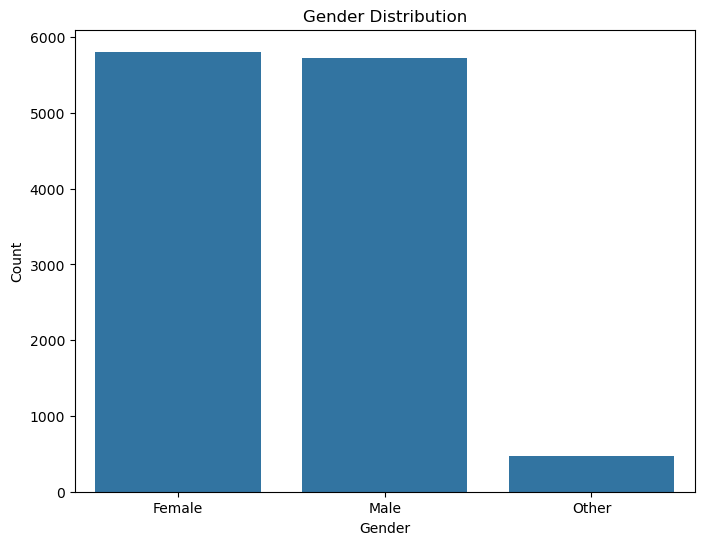

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

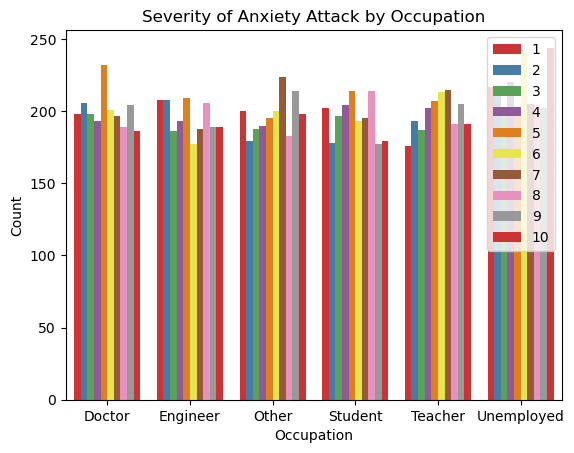

In [21]:
sns.countplot(x='Occupation', hue='Severity of Anxiety Attack (1-10)', data=df, palette='Set1')
plt.title('Severity of Anxiety Attack by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

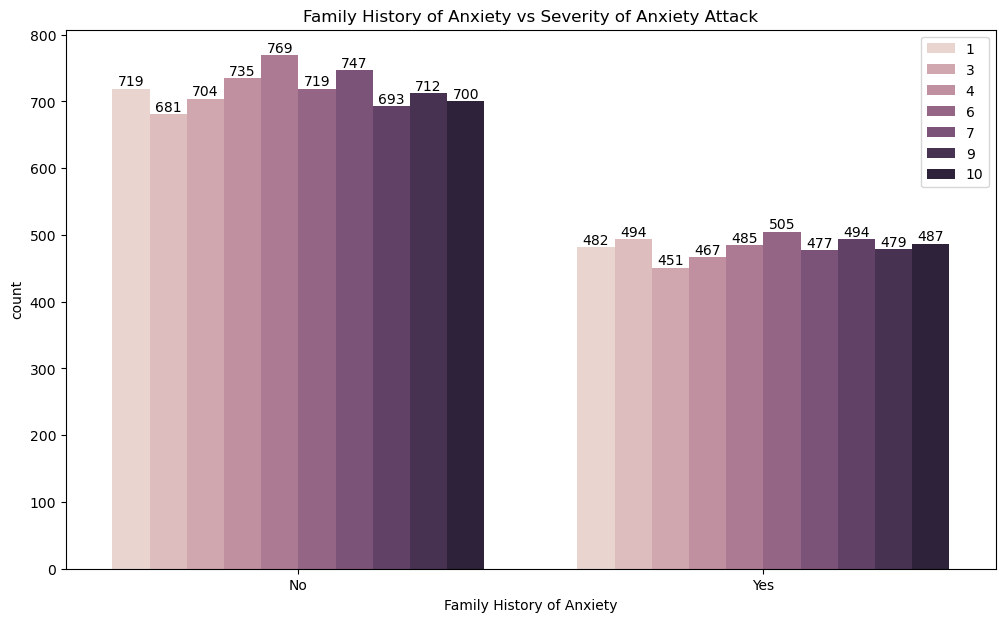

In [22]:
plt.figure(figsize=(12,7))
ax=sns.countplot(data=df,x='Family History of Anxiety',hue='Severity of Anxiety Attack (1-10)')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc="best")
plt.title("Family History of Anxiety vs Severity of Anxiety Attack")
plt.show()

Pair plot for selected features

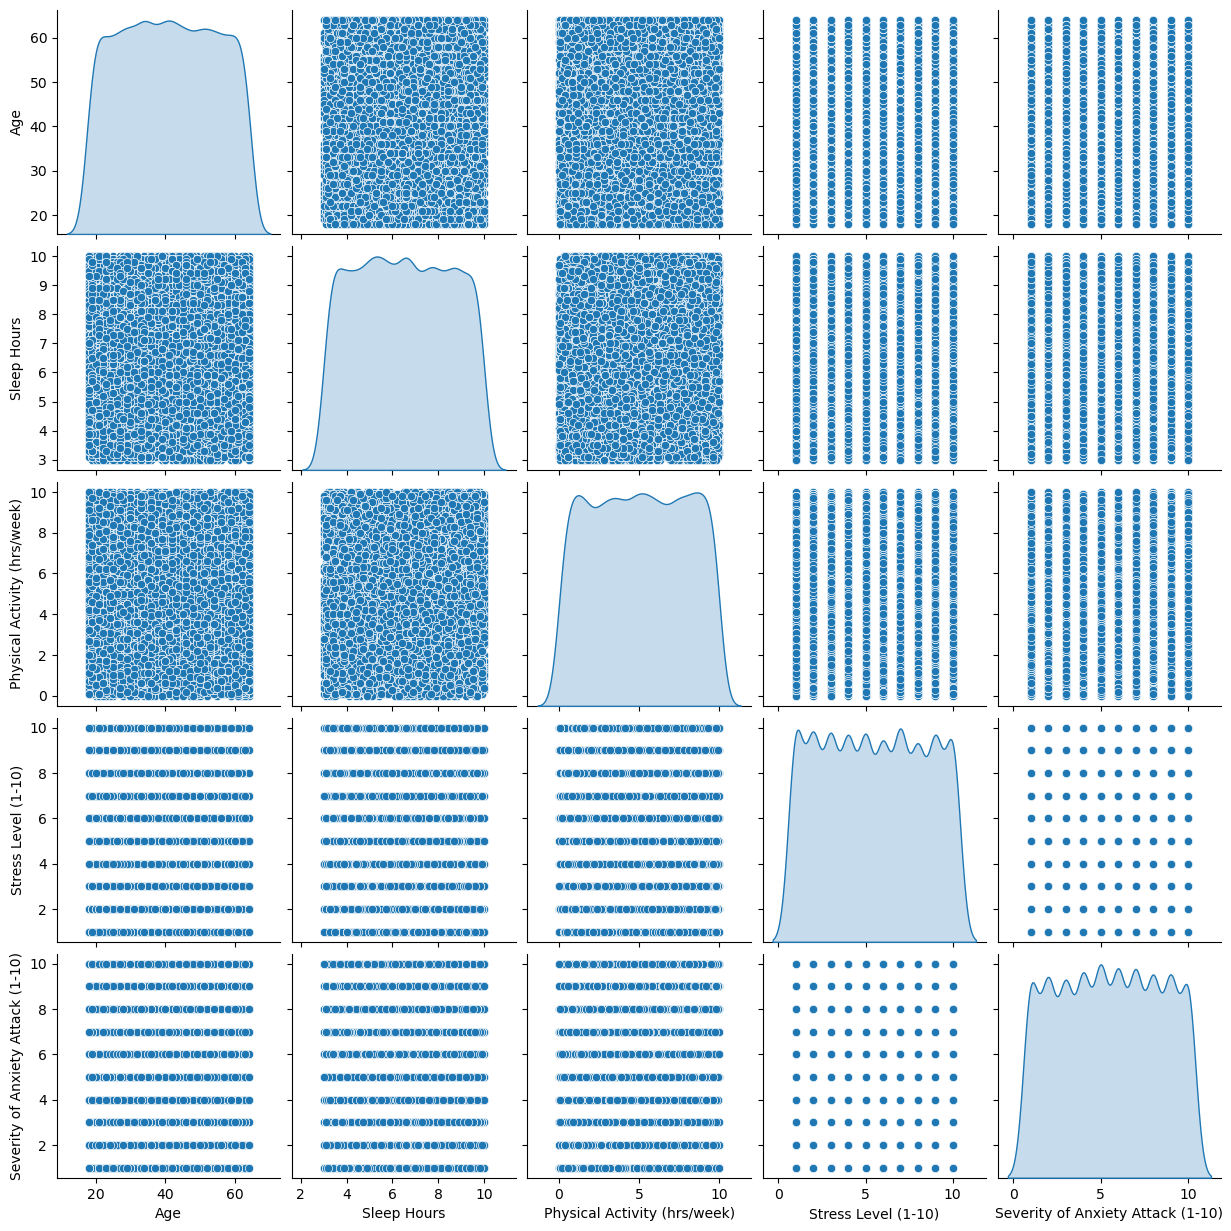

In [26]:
selected_features = ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Stress Level (1-10)', 'Severity of Anxiety Attack (1-10)']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()

# Visualize the distribution of the target variable

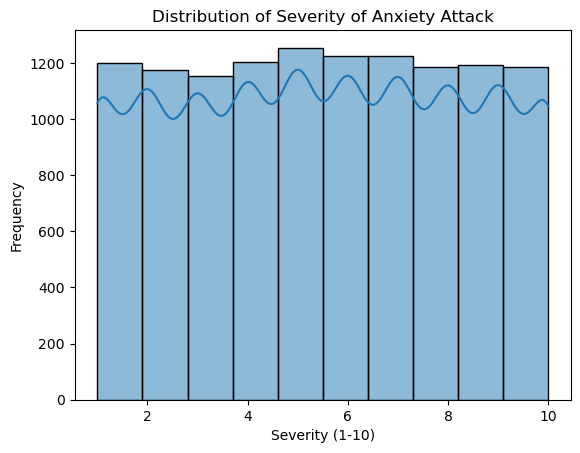

In [15]:
sns.histplot(df['Severity of Anxiety Attack (1-10)'], bins=10, kde=True)
plt.title('Distribution of Severity of Anxiety Attack')
plt.xlabel('Severity (1-10)')
plt.ylabel('Frequency')
plt.show()

# CORRELATION ANALYSIS

Correlation heatmap for numeric variables

In [23]:
numeric_df=df.select_dtypes(include=["int64","float64"])
cor=numeric_df.corr()
cor

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
Age,1.000000,0.006185,-0.003631,-0.004578,-0.002640,0.013531,-0.020418,0.005677,-0.011038,0.007433,0.005687,-0.020083
Sleep Hours,0.006185,1.000000,0.003628,0.004978,0.022494,0.002934,-0.014090,-0.006555,0.011775,0.002203,0.004538,-0.003293
Physical Activity (hrs/week),-0.003631,0.003628,1.000000,0.002304,-0.002540,-0.003662,0.009771,-0.008907,0.006183,-0.000600,0.001773,0.018012
Caffeine Intake (mg/day),-0.004578,0.004978,0.002304,1.000000,-0.008273,0.019628,-0.004907,0.007220,-0.006122,0.003084,0.001861,0.004023
Alcohol Consumption (drinks/week),-0.002640,0.022494,-0.002540,-0.008273,1.000000,0.003372,-0.006033,0.000778,-0.006501,-0.002817,0.017564,0.009288
Stress Level (1-10),0.013531,0.002934,-0.003662,0.019628,0.003372,1.000000,-0.008752,-0.009164,-0.016192,0.014055,0.011108,0.003194
Heart Rate (bpm during attack),-0.020418,-0.014090,0.009771,-0.004907,-0.006033,-0.008752,1.000000,0.001879,-0.007522,0.017687,-0.001068,-0.000312
Breathing Rate (breaths/min),0.005677,-0.006555,-0.008907,0.007220,0.000778,-0.009164,0.001879,1.000000,-0.014413,0.011353,-0.003966,0.006471
Sweating Level (1-5),-0.011038,0.011775,0.006183,-0.006122,-0.006501,-0.016192,-0.007522,-0.014413,1.000000,-0.011054,-0.002710,0.008773
Therapy Sessions (per month),0.007433,0.002203,-0.000600,0.003084,-0.002817,0.014055,0.017687,0.011353,-0.011054,1.000000,0.001542,-0.013648


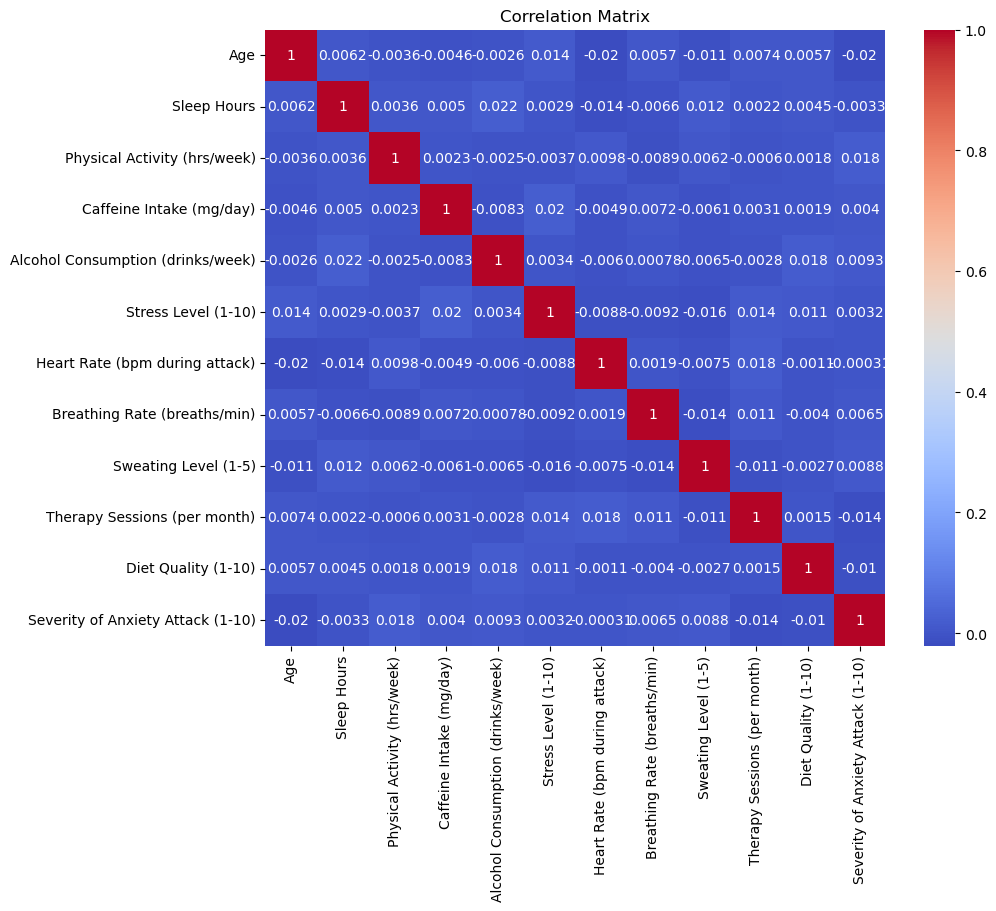

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#  Data Preprocessing

In [97]:
encoder = LabelEncoder()
label_mappings = {}
for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

In [96]:
df.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,0,2,9.6,8.3,175,6,0,0,4,145,33,3,0,0,4,1,9,10
1,2,46,1,4,6.4,7.3,97,6,0,0,3,143,18,5,1,0,0,0,9,8
2,3,32,0,0,6.9,1.0,467,14,0,0,2,60,34,1,0,0,7,1,10,5
3,4,60,1,0,9.2,3.7,471,16,0,1,6,94,19,1,0,1,4,1,5,8
4,5,25,1,3,9.2,2.5,364,2,0,1,7,152,15,4,0,1,0,0,1,1


# Training the Model

In [102]:
X = df.drop(columns=['Severity of Anxiety Attack (1-10)'], axis = 1)
y = df['Severity of Anxiety Attack (1-10)']
X.head(2)

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10)
0,1,56,0,2,9.6,8.3,175,6,0,0,4,145,33,3,0,0,4,1,9
1,2,46,1,4,6.4,7.3,97,6,0,0,3,143,18,5,1,0,0,0,9


In [88]:
y.head(2)

0    10
1     8
Name: Severity of Anxiety Attack (1-10), dtype: int64

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9600, 19) (2400, 19) (9600,) (2400,)


Data Encoding & Scalling

In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [106]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [142]:
y_pred_log = log_reg.predict(X_test_scaled)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Classifier Accuracy: {accuracy_log * 100:.2f}%')
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Classifier Accuracy: 9.00%
Classification Report:
               precision    recall  f1-score   support

           1       0.11      0.09      0.10       236
           2       0.08      0.11      0.09       247
           3       0.07      0.08      0.07       212
           4       0.13      0.07      0.09       261
           5       0.10      0.17      0.12       233
           6       0.14      0.09      0.11       256
           7       0.09      0.11      0.10       249
           8       0.09      0.10      0.09       226
           9       0.06      0.04      0.04       255
          10       0.05      0.05      0.05       225

    accuracy                           0.09      2400
   macro avg       0.09      0.09      0.09      2400
weighted avg       0.09      0.09      0.09      2400



# Random Forest Classifier

In [111]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [141]:
y_pred_ran = rf_classifier.predict(X_test_scaled)
accuracy_ran = accuracy_score(y_test, y_pred_ran)
print(f'Random Forest Classifier Accuracy: {accuracy_ran * 100:.2f}%')
print("Classification Report:\n", classification_report(y_test, y_pred_ran))

Random Forest Classifier Accuracy: 9.88%
Classification Report:
               precision    recall  f1-score   support

           1       0.12      0.13      0.13       236
           2       0.11      0.13      0.12       247
           3       0.08      0.11      0.09       212
           4       0.07      0.06      0.06       261
           5       0.10      0.15      0.12       233
           6       0.08      0.07      0.07       256
           7       0.11      0.11      0.11       249
           8       0.08      0.08      0.08       226
           9       0.11      0.07      0.09       255
          10       0.11      0.09      0.10       225

    accuracy                           0.10      2400
   macro avg       0.10      0.10      0.10      2400
weighted avg       0.10      0.10      0.10      2400



# Decision Tree Classifier

In [113]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [140]:
y_pred_dec = dt_classifier.predict(X_test_scaled)
accuracy_dec = accuracy_score(y_test, y_pred_dec)
print(f'Decision Tree Classifier Accuracy: {accuracy_dec * 100:.2f}%')
print("Classification Report:\n", classification_report(y_test, y_pred_dec))

Decision Tree Classifier Accuracy: 9.42%
Classification Report:
               precision    recall  f1-score   support

           1       0.10      0.11      0.10       236
           2       0.09      0.08      0.08       247
           3       0.09      0.10      0.10       212
           4       0.12      0.11      0.12       261
           5       0.09      0.09      0.09       233
           6       0.08      0.08      0.08       256
           7       0.12      0.12      0.12       249
           8       0.09      0.08      0.08       226
           9       0.10      0.09      0.10       255
          10       0.06      0.06      0.06       225

    accuracy                           0.09      2400
   macro avg       0.09      0.09      0.09      2400
weighted avg       0.09      0.09      0.09      2400



# K-Nearest Neighbors Classifier

In [115]:
knn_classifier = KNeighborsClassifier(n_neighbors=5) 
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [139]:
y_pred_knn = knn_classifier.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn * 100:.2f}%')
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 10.21%
Classification Report:
               precision    recall  f1-score   support

           1       0.11      0.28      0.16       236
           2       0.09      0.13      0.10       247
           3       0.09      0.11      0.10       212
           4       0.09      0.08      0.08       261
           5       0.12      0.12      0.12       233
           6       0.11      0.07      0.09       256
           7       0.10      0.06      0.08       249
           8       0.11      0.07      0.08       226
           9       0.11      0.05      0.07       255
          10       0.10      0.06      0.08       225

    accuracy                           0.10      2400
   macro avg       0.10      0.10      0.10      2400
weighted avg       0.10      0.10      0.10      2400



# Support Vector Classifier

In [118]:
svc_classifier = SVC(kernel='linear', random_state=42)  
svc_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [138]:
y_pred_svc = svc_classifier.predict(X_test_scaled)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Support Vector Classifier Accuracy: {accuracy_svc * 100:.2f}%')
print("Classification Report:\n", classification_report(y_test, y_pred_svc))

Support Vector Classifier Accuracy: 9.83%
Classification Report:
               precision    recall  f1-score   support

           1       0.11      0.13      0.12       236
           2       0.09      0.14      0.11       247
           3       0.08      0.09      0.08       212
           4       0.17      0.06      0.09       261
           5       0.10      0.18      0.13       233
           6       0.12      0.09      0.10       256
           7       0.12      0.15      0.13       249
           8       0.09      0.08      0.08       226
           9       0.06      0.02      0.03       255
          10       0.06      0.06      0.06       225

    accuracy                           0.10      2400
   macro avg       0.10      0.10      0.09      2400
weighted avg       0.10      0.10      0.09      2400



# Compairing the models

In [147]:
models = ['Logistic Regression','Random Forest', 'Decision Tree','KNN', 'Support Vector']
accuracies = [accuracy_log,accuracy_ran,accuracy_dec,accuracy_knn,accuracy_svc]
df_results = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
df_results

,Model,Accuracy
0,Logistic Regression,0.090000
1,Random Forest,0.098750
2,Decision Tree,0.094167
3,KNN,0.102083
4,Support Vector,0.098333


# Visualization of Result 

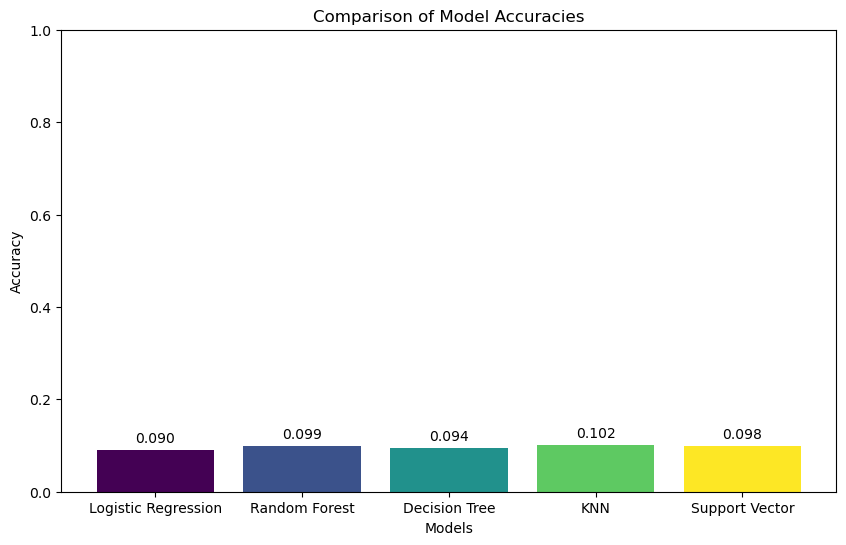

In [150]:
models = ['Logistic Regression','Random Forest','Decision Tree', 'KNN', 'Support Vector']
accuracies = [accuracy_log,accuracy_ran,accuracy_dec,accuracy_knn,accuracy_svc]
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{accuracy:.3f}', ha='center', va='bottom')
plt.show()

# Conclusion

In this project, we analyzed a dataset related to severity of anxiety attack. We performed data exploration, visualization, preprocessing, and predictive modeling using various machine learning algorithms.The model's performance was evaluated according to the accuracy.
Based on this accuracy comparison of various models, the KNN Model achieves an accuracy of approximately 10.2%, making it the best fit for prediction.